# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Dataset:-Imóveis-em-Boston" data-toc-modified-id="Dataset:-Imóveis-em-Boston-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset: Imóveis em Boston</a></div><div class="lev2 toc-item"><a href="#Obtendo-os-dados" data-toc-modified-id="Obtendo-os-dados-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Obtendo os dados</a></div><div class="lev3 toc-item"><a href="#Detetando-um-problema" data-toc-modified-id="Detetando-um-problema-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Detetando um problema</a></div><div class="lev2 toc-item"><a href="#Visualizando-distribuição-dos-atributos-via-boxplot" data-toc-modified-id="Visualizando-distribuição-dos-atributos-via-boxplot-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizando distribuição dos atributos via boxplot</a></div><div class="lev2 toc-item"><a href="#Limpando-e-normalizando-os-dados" data-toc-modified-id="Limpando-e-normalizando-os-dados-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Limpando e normalizando os dados</a></div><div class="lev3 toc-item"><a href="#Visualizando-novamente-os-dados-com-boxplot" data-toc-modified-id="Visualizando-novamente-os-dados-com-boxplot-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Visualizando novamente os dados com boxplot</a></div><div class="lev2 toc-item"><a href="#Organização-dos-dados" data-toc-modified-id="Organização-dos-dados-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Organização dos dados</a></div><div class="lev2 toc-item"><a href="#Salvando-os-arrays-no-folder-data-para-uso-futuro" data-toc-modified-id="Salvando-os-arrays-no-folder-data-para-uso-futuro-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Salvando os arrays no folder data para uso futuro</a></div><div class="lev3 toc-item"><a href="#Salvando-de-forma-comprimida-e-eficiente-usando-bcolz" data-toc-modified-id="Salvando-de-forma-comprimida-e-eficiente-usando-bcolz-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Salvando de forma comprimida e eficiente usando bcolz</a></div><div class="lev2 toc-item"><a href="#Regressão-Linear" data-toc-modified-id="Regressão-Linear-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Regressão Linear</a></div><div class="lev2 toc-item"><a href="#Aprendizados" data-toc-modified-id="Aprendizados-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Aprendizados</a></div>

# Dataset: Imóveis em Boston

O objetivo deste notebook é 
- demonstrar uma leitura e análise inicial de um dataset visando
- encontrar eventuais inconsistências e 
- pré processá-lo para tornar mais adaptado ao uso de treinamento de uma rede neural.

Os dados processados são salvos em arquivo para ser lido posteriormente.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plot
from IPython.display import display
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf

## Obtendo os dados

In [3]:
# --------------------------------------------------------------------------------
# Boston Housing Data Set
# -----------------------
# [https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
# --------------------------------------------------------------------------------
from keras.datasets import boston_housing
(Xtra, ytra), (Xval, yval) = boston_housing.load_data()

Xpd, ypd = pd.DataFrame(Xtra), pd.DataFrame(ytra)
display(Xpd.head())
display(ypd.head())

Using TensorFlow backend.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7


### Detetando um problema

Observe que o atributo 12 do dataset é igual ao target (y):

In [4]:
print(Xtra[:5,-1], Xtra.dtype)
print(ytra[:5], ytra.dtype)

[ 18.72   3.11   3.26   8.01  14.65] float64
[ 15.2  42.3  50.   21.1  17.7] float64


## Visualizando distribuição dos atributos via boxplot

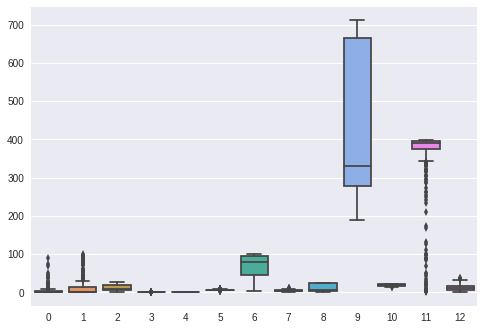

In [5]:
import seaborn as sns
sns.boxplot(data=Xtra);

## Limpando e normalizando os dados

Retira-se a coluna 12 do dataset e normaliza-se
os dados para média zero e variância 1 por característica.

In [6]:
Xtra, Xval = Xtra[:,:-1].astype(np.float32), Xval[:,:-1].astype(np.float32)
ytra, yval = ytra.reshape(-1, 1).astype(np.float32), yval.reshape(-1, 1).astype(np.float32)

mean = Xtra.mean(axis=0)
Xtra -= mean
std = Xtra.std(axis=0)
Xtra /= std

Xval -= mean
Xval /= std

m, n = Xtra.shape
print('Shapes:', Xtra.shape, Xval.shape, Xtra.dtype, ytra.shape, yval.shape)
print('Data: min={:.3f}, mean={:.3f}, max={:.3f}, std={:.3f}'.format(Xtra.min(), Xtra.mean(), Xtra.max(), Xtra.std()))
print('Target: min={:.3f}, mean={:.3f}, max={:.3f}, std={:.3f}'.format(ytra.min(), ytra.mean(), ytra.max(), ytra.std()))


Shapes: (404, 12) (102, 12) float32 (404, 1) (102, 1)
Data: min=-3.817, mean=-0.000, max=9.235, std=1.000
Target: min=5.000, mean=22.395, max=50.000, std=9.199


### Visualizando os dados normalizados com boxplot

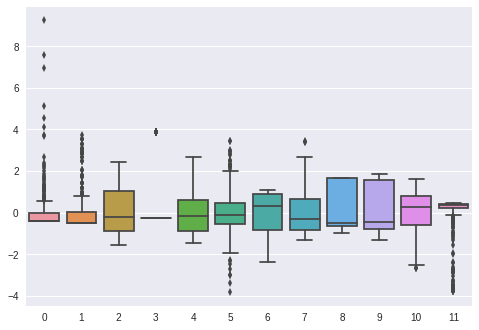

In [7]:
sns.boxplot(data=Xtra)

## Organização dos dados

Os dados de treinamento estão organizados em matrizes onde as linhas representam as amostras e as colunas os atributos. Neste exemplo a matriz X tem 404 linhas (amostras) e 12 colunas (atributos), de 0 a 11. Já a matriz alvo possui uma coluna e 404 linhas.

In [8]:
print('Treinamento:',Xtra.shape, ytra.shape)

Treinamento: (404, 12) (404, 1)


\begin{align*} 
\mathbf{X}_{train} & = \begin{bmatrix}
\longleftarrow & (\mathbf{x}^{(0)})^T & \longrightarrow \\ 
\longleftarrow & (\mathbf{x}^{(1)})^T & \longrightarrow \\ 
  & \vdots  & \\ 
\longleftarrow & (\mathbf{x}^{(m-1)})^T & \longrightarrow 
\end{bmatrix} = \begin{bmatrix}
x_0^{(0)} & x_1^{(0)} & x_2^{(0)} & \ldots & x_{11}^{(0)} \\
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \ldots & x_{11}^{(1)} \\
 &  & \vdots  & \\ 
x_0^{(403)} & x_1^{(403)} & x_2^{(403)} & \ldots & x_{11}^{(403)}
\end{bmatrix} \\
\\
\mathbf{y}_{train} & = \begin{bmatrix}
y^{(0)} \\
y^{(1)} \\
\vdots  \\ 
y^{(403)} \\
\end{bmatrix}
\end{align*}


## Salvando os dados no diretório data para uso futuro

Utiliza-se a função `savez` para salvar vários arrays do NumPy num único arquivo, para posterior leitura.

In [9]:
np.savez('../data/boston_housing', Xtra=Xtra, Xval=Xval, ytra=ytra, yval=yval)

## Testando a leitura

In [12]:
data = np.load('../data/boston_housing.npz')
data.keys()

['Xtra', 'Xval', 'ytra', 'yval']

In [16]:
Xtra_n, Xval_n, ytra_n, yval_n = data['Xtra'],data['Xval'], data['ytra'], data['yval']
np.array_equal(Xtra_n,Xtra_n) 

True

## Regressão Linear

Vamos calcular uma regressão linear simples, para termos uma ideia do valor do custo. 

$$ \mathbf{\hat{y}} = \mathbf{X} \cdot \mathbf{W} $$

Utilizamos a *equação normal* para calcular os pesos:

$$  \mathbf{W} =(\mathbf{X}^T \mathbf{X})^{−1}\mathbf{X}^T \mathbf{y} $$

O MSE (Mean Square Error) - Erro médio quadrático é dado pela média do erro quadrático $E^2$: 

$$ E^2 = (\mathbf{\hat{y}} - \mathbf{y})^2 $$

In [10]:
W = np.linalg.inv((Xtra.T).dot(Xtra)).dot(Xtra.T).dot(ytra)

mse_train = np.mean(np.square(np.dot(Xtra, W) - ytra))
mse_valid = np.mean(np.square(np.dot(Xval, W) - yval))

print('MSE train: {:.3f}'.format(mse_train))
print('MSE valid: {:.3f}'.format(mse_valid))

MSE train: 529.381
MSE valid: 514.645


## Aprendizados
